In [1]:
#import dependencies 

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#initialize lists and variables

tickerlist = [] 
shares = []
prices = []
total = []

assetval = 0
total_portfolio_val = 0

In [3]:
#get stock price with yahoo finance api library 

def getCurrentPrice(symb): 
    tick = yf.Ticker(symb)
    df = tick.history(period='1m')
    return df['Close'][0]

In [ ]:
#read brokerage .csv file to dataframe

df1 = pd.read_csv(r'C:\Users\arunp\Downloads\Individual-Positions-2020-08-20-012716.csv', header = 1) 
df1.dropna(axis = 1)

In [4]:
#cleaning data

df1 = df1.drop('Intrinsic Value', axis = 1) 
df1 = df1.drop('In The Money', axis = 1)
df1 = df1[df1['Quantity'] != '0']

mval = df1['Market Value'].values.tolist()
total_portfolio_val = mval[len(mval) - 1]
cash_bal = mval[len(mval) - 2]

df1['Quantity'] = df1['Quantity'].replace('--', np.nan)
df1['Quantity'] = df1['Quantity'].astype(float)

#loading and formatting data 

for amt in df1['Quantity'].dropna(): 
    shares.append(amt)
    
for ticker in df1['Symbol']:
    if ticker.isupper():
        tickerlist.append(ticker)
        prices.append(getCurrentPrice(ticker))

for i in range(len(shares)):
    total.append(format(float(shares[i] * prices[i]), '.2f'))
    assetval += float(shares[i] * prices[i])

    assetval = format(assetval, '.2f')
assetval = float(assetval)

for i in range(len(prices)):
    prices[i] = format(float(prices[i]), '.2f')

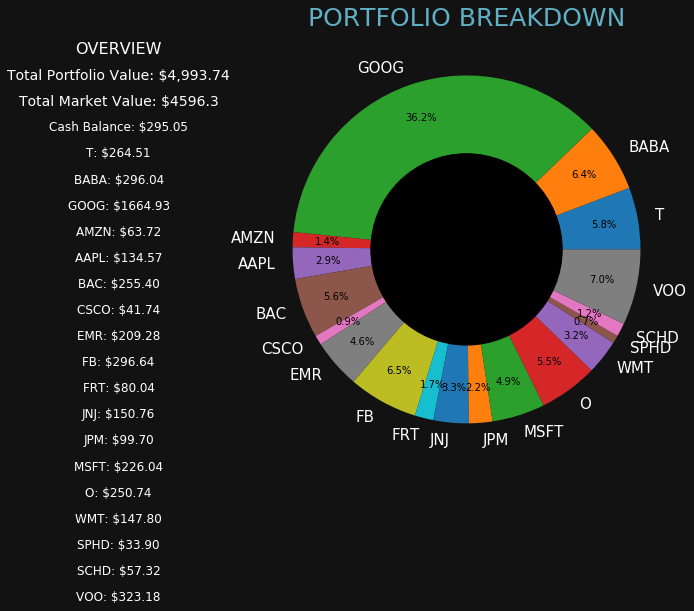

In [5]:
#create subplots

fig, ax = plt.subplots(figsize=(16, 8)) 

ax.set_facecolor('black')
ax.figure.set_facecolor('#121212')

ax.tick_params(axis='x', color='white')
ax.tick_params(axis='y', color='white')

ax.set_title('PORTFOLIO BREAKDOWN', color="#60afc4", fontsize=25)

#create pie chart on axes

_, texts, _ = ax.pie(total, labels=tickerlist, autopct='%1.1f%%', pctdistance=0.8) 
[text.set_color('white') for text in texts]
[text.set_fontsize(15) for text in texts]

center_circle = plt.Circle((0,0), 0.55, color='black')
plt.gca().add_artist(center_circle)

#Overview and holdings data to text 

ax.text(-2, 1.15, 'OVERVIEW', fontsize=16, color='white', verticalalignment='center', horizontalalignment='center')
ax.text(-2, 1, f'Total Portfolio Value: {total_portfolio_val}', fontsize=14, color='white', verticalalignment='center', horizontalalignment='center')
ax.text(-2, 0.85, f'Total Market Value: ${assetval}', fontsize=14, color='white', verticalalignment='center', horizontalalignment='center')
ax.text(-2, 0.70, f'Cash Balance: {cash_bal}', fontsize=12, color='white', verticalalignment='center', horizontalalignment='center')

spacing = 0.15

for ticker in tickerlist:
    ax.text(-2, 0.70 - spacing, f'{ticker}: ${total[tickerlist.index(ticker)]}', fontsize=12, color='white',verticalalignment='center', horizontalalignment='center')
    spacing += 0.15